# Unsupervised Learning:
An approach using K-Means Clustering and Gaussian Mixture Models

In [1]:
%matplotlib inline
import scipy
import numpy as np
import itertools
import matplotlib.pyplot as plt

## 1. Generating the data

First, we will generate some data for this problem. Set the number of points $N=400$, their dimension $D=2$, and the number of clusters $K=2$, and generate data from the distribution $p(x|z=k) = \mathcal{N}(\mu_k, \Sigma_k)$.
  Sample $200$ data points for $k=1$ and 200 for $k=2$, with

  $$
    \mu_1=
    \begin{bmatrix}
      0.1 \\
      0.1
    \end{bmatrix}
    \ \text{,}\
    \mu_2=
    \begin{bmatrix}
      6.0 \\
      0.1
    \end{bmatrix}
    \ \text{ and }\
    \Sigma_1=\Sigma_2=
    \begin{bmatrix}
      10       & 7 \\
      7 & 10
    \end{bmatrix}
  $$
  Here, $N=400$ and since we generated the data, we already know which sample comes from which class.

In [2]:
# Generate the data
num_samples = 400
cov = np.array([[1., .7], [.7, 1.]]) * 10
mean_1 = [.1, .1]
mean_2 = [6., .1]

x_class1 = np.random.multivariate_normal(mean_1, cov, num_samples // 2)
x_class2 = np.random.multivariate_normal(mean_2, cov, num_samples // 2)
xy_class1 = np.column_stack((x_class1, np.zeros(num_samples // 2)))
xy_class2 = np.column_stack((x_class2, np.ones(num_samples // 2)))
data_full = np.row_stack([xy_class1, xy_class2])
np.random.shuffle(data_full)
data = data_full[:, :2]
labels = data_full[:, 2]

Make a scatter plot of the data points showing the true cluster assignment of each point using different color codes and shape ($x$ for first class and circles for second class):

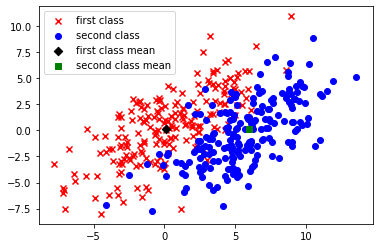

In [4]:
# Make a scatterplot for the data points showing the true cluster assignments of each point
#print(data)
plt.figure()
plt.scatter(xy_class1[:,0], xy_class1[:,1], marker = "x", c = 'red', label = "first class") # first class, x shape
plt.scatter(xy_class2[:,0], xy_class2[:,1], marker = "o", c = 'blue', label = "second class") # second class, circle shape
plt.scatter(mean_1[0], mean_1[1], marker = "D", c = 'black', label = "first class mean")
plt.scatter(mean_2[0], mean_2[1], marker = "s", c = 'green', label = "second class mean")
plt.legend()

## 2. Implement and Run K-Means algorithm

Now, we assume that the true class labels are not known. We will now implement the k-means algorithm for this problem.
  Implement the two functions: `km_assignment_step`, and `km_refitting_step` (`km_` is an abbreviation for k-means here).
  We wil initialize the algorithm with
  $$
    \hat\mu_1=
    \begin{bmatrix}
      0.0 \\
      0.0
    \end{bmatrix}
    \ \text{,}\
    \hat\mu_2=
    \begin{bmatrix}
      1.0 \\
      1.0
    \end{bmatrix}
  $$
  and run it until convergence.
  Then we will show the resulting cluster assignments on a scatter plot using different color codes and shape and plot the cost vs. the number of iterations along with the misclassification error rates.

In [6]:
def cost(data, R, Mu):
    N, D = data.shape
    K = Mu.shape[1]
    J = 0
    for k in range(K):
        J += np.dot(np.linalg.norm(data - np.array([Mu[:, k], ] * N), axis=1)**2, R[:, k])
    return J

In [7]:
# K-Means Assignment Step
def km_assignment_step(data, Mu):
    """ Compute K-Means assignment step
    
    Args:
        data: a NxD matrix for the data points
        Mu: a DxK matrix for the cluster means locations
    
    Returns:
        R_new: a NxK matrix of responsibilities
    """
    N, D = data.shape # Number of datapoints and dimension of datapoint
    K = Mu.shape[1] # number of clusters
    r = np.empty([N, K]) #a matrix of NxK dimension for the distances of the the N datapoints to each of the K cluster centers. 
    for k in range(K):
        r[:, k] = np.linalg.norm(Mu[:,k] - data, axis=1)**2
        
    arg_min = np.argmin(r, axis=1) # argmax/argmin along dimension 1
    R_new = np.zeros([N, K]) # Set to zeros/ones with shape (N, K) 
    
   # If we initialize with zeros and use argmax, we just need to invert (e.g. 1-argmax) the indices and then plug in to R_new. 
   # print(np.linalg.norm(Mu[:,k] - data)**2)
    for i in range(len(arg_min)):
        R_new[i, arg_min[i]] = 1 # Assign to 1
    return R_new

In [8]:
# K-means Refitting Step
def km_refitting_step(data, R, Mu):
    """ Compute K-Means refitting step.
    Args:
        data: a NxD matrix for the data points
        R: a NxK matrix of responsibilities
        Mu: a DxK matrix for the cluster means locations
    
    Returns:
        Mu_new: a DxK matrix for the new cluster means locations
    """
    N, D = data.shape # Number of datapoints and dimension of datapoint
    K = Mu.shape[1]  # number of clusters
    Mu_new = np.transpose(data).dot(R)/np.sum(R, axis=0)
    return Mu_new

In [9]:
# Run this cell to call the K-means algorithm
N, D = data.shape
K = 2
max_iter = 100
class_init = np.random.binomial(1., .5, size=N)
R = np.vstack([class_init, 1 - class_init]).T

Mu = np.zeros([D, K])
Mu[:, 1] = 1.
R.T.dot(data), np.sum(R, axis=0)

num_iter = []
cost_per_iter = []

for it in range(max_iter):
    R = km_assignment_step(data, Mu)
    Mu = km_refitting_step(data, R, Mu)
#    print(it, cost(data, R, Mu))
    num_iter.append(it)
    cost_per_iter.append(cost(data, R, Mu))
    
class_1 = np.where(R[:, 0])
class_2 = np.where(R[:, 1])

class_1_points = []
class_2_points = []

for i in class_1:
    class_1_points.append(data[i])
    
for i in class_2:
    class_2_points.append(data[i])

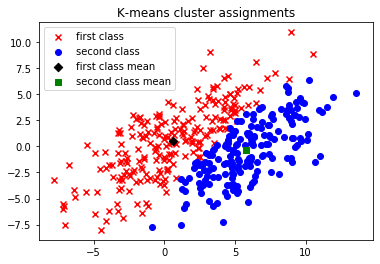

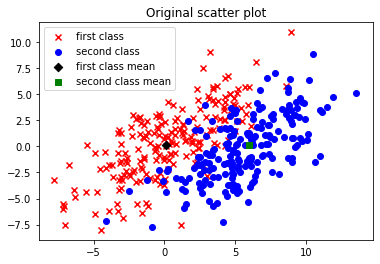

In [36]:
# Make a scatterplot for the data points showing the K-Means cluster assignments of each point
plt.figure()
plt.scatter(class_1_points[0][:,0], class_1_points[0][:,1], marker = "x", c = 'red', label = "first class") # first class, x shape
plt.scatter(class_2_points[0][:,0], class_2_points[0][:,1], marker = "o", c = 'blue', label = "second class") # second class, circle shape
plt.scatter(Mu[:,0][0], Mu[:,0][1], marker = "D", c = 'black', label = "first class mean")
plt.scatter(Mu[:,1][0], Mu[:,1][1], marker = "s", c = 'green', label = "second class mean")
plt.title("K-means cluster assignments")
plt.legend()

#Plot original scatterplot for comparison
plt.figure()
plt.scatter(xy_class1[:,0], xy_class1[:,1], marker = "x", c = 'red', label = "first class") # first class, x shape
plt.scatter(xy_class2[:,0], xy_class2[:,1], marker = "o", c = 'blue', label = "second class") # second class, circle shape
plt.scatter(mean_1[0], mean_1[1], marker = "D", c = 'black', label = "first class mean")
plt.scatter(mean_2[0], mean_2[1], marker = "s", c = 'green', label = "second class mean")
plt.title("Original scatter plot")
plt.legend()

### Misclassification Error

Final misclassification error: 0.26249999999999996


Text(0, 0.5, 'cost')

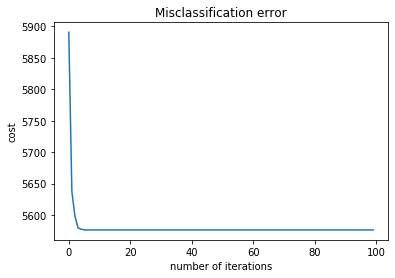

In [22]:
count_1 = 0
count_2 = 0
#print(x_class1)
for i in class_1_points[0]:
    if i in x_class1:
        count_1 += 1

for i in class_2_points[0]:
    if i in x_class2:
        count_2 += 1
        
accuracy = (count_1+count_2) / N
error = 1 - accuracy
print("Final misclassification error: " + str(error))

plt.figure()
plt.title("Misclassification error")
plt.plot(num_iter, cost_per_iter)
plt.xlabel('number of iterations')
plt.ylabel('cost')


## 3. Implement EM algorithm for Gaussian mixtures
Next, we will implement the EM algorithm for Gaussian mixtures.
  Implement the three functions: `log_likelihood`, `gm_e_step`, and `gm_m_step`.
  Initialize the algorithm with means as the previous k-means initialization, covariances with $\hat\Sigma_1=\hat\Sigma_2=I$,
  and $\hat\pi_1=\hat\pi_2$.

  In addition to the update equations, for the M (Maximization) step, we will use the following equation to update the covariance $\Sigma_k$:
$$\hat{\mathbf{\Sigma}_k} = \frac{1}{N_k} \sum^N_{n=1} r_k^{(n)}(\mathbf{x}^{(n)} - \hat{\mathbf{\mu}_k})(\mathbf{x}^{(n)} - \hat{\mathbf{\mu}_k})^{\top}$$
    
  Run the algorithm until convergence and show the resulting cluster assignments on a scatter plot either using different color codes and shapes and plot the log-likelihood vs. the number of iterations along with the misclassification error.

In [23]:
def normal_density(x, mu, Sigma):
    return np.exp(-.5 * np.dot(x - mu, np.linalg.solve(Sigma, x - mu))) \
        / np.sqrt(np.linalg.det(2 * np.pi * Sigma))

In [25]:
def log_likelihood(data, Mu, Sigma, Pi):
    """ Compute log likelihood on the data given the Gaussian Mixture Parameters.
    
    Args:
        data: a NxD matrix for the data points
        Mu: a DxK matrix for the means of the K Gaussian Mixtures
        Sigma: a list of size K with each element being DxD covariance matrix
        Pi: a vector of size K for the mixing coefficients
    
    Returns:
        L: a scalar denoting the log likelihood of the data given the Gaussian Mixture
    """
    N, D = data.shape  # Number of datapoints and dimension of datapoint
    K = Mu.shape[1] # number of mixtures
    L =  0.
    for n in range(N):
        T = 0
        for k in range(K):
            T += Pi[k] * normal_density(data[n,:], Mu[:,k], Sigma[k]) # Compute the likelihood from the k-th Gaussian weighted by the mixing coefficients 
        L += np.log(T)
    return L

In [27]:
# Gaussian Mixture Expectation Step
def gm_e_step(data, Mu, Sigma, Pi):
    """ Gaussian Mixture Expectation Step.

    Args:
        data: a NxD matrix for the data points
        Mu: a DxK matrix for the means of the K Gaussian Mixtures
        Sigma: a list of size K with each element being DxD covariance matrix
        Pi: a vector of size K for the mixing coefficients
    
    Returns:
        Gamma: a NxK matrix of responsibilities 
    """

    N, D = data.shape  # Number of datapoints and dimension of datapoint
    K = Mu.shape[1] # number of mixtures
    Gamma = np.zeros([N,K]) # zeros of shape (N,K), matrix of responsibilities
    for n in range(N):
        for k in range(K):
            Gamma[n, k] = Pi[k] * normal_density(data[n,:], Mu[:,k], Sigma[k])
        Gamma[n, :] /= np.sum(Gamma[n]) # Normalize by sum across second dimension (mixtures)
    return Gamma

In [28]:
# Gaussian Mixture Maximization Step
def gm_m_step(data, Gamma):
    """ Gaussian Mixture Maximization Step.

    Args:
        data: a NxD matrix for the data points
        Gamma: a NxK matrix of responsibilities 
    
    Returns:
        Mu: a DxK matrix for the means of the K Gaussian Mixtures
        Sigma: a list of size K with each element being DxD covariance matrix
        Pi: a vector of size K for the mixing coefficients
    """
    N, D = data.shape  # Number of datapoints and dimension of datapoint
    K = Gamma.shape[1] # number of mixtures
    Nk = np.sum(Gamma, axis=0) # Sum along first axis 
    Mu = np.dot(data.T, Gamma)/Nk
    Sigma = np.zeros([K,D,D])

    for k in range(K):
        sig = np.zeros([2,2])
        for i in range(N):
            sig += Gamma[i,k] * np.outer((data[i]-Mu[:,k]), (np.matrix(data[i] - Mu[:,k])).T)
        Sigma[k] = sig/Nk[k] 
    Pi = Nk/N
    return Mu, Sigma, Pi

In [31]:
# Run this cell to call the Gaussian Mixture EM algorithm
N, D = data.shape
K = 2
Mu = np.zeros([D, K])
Mu[:, 1] = 1.
Sigma = [np.eye(2), np.eye(2)]
Pi = np.ones(K) / K
Gamma = np.zeros([N, K]) # Gamma is the matrix of responsibilities 

max_iter  = 200
num_iter_log = []
log_likelihood_per_iter = []

for it in range(max_iter):
    Gamma = gm_e_step(data, Mu, Sigma, Pi)
    Mu, Sigma, Pi = gm_m_step(data, Gamma)
    # print(it, log_likelihood(data, Mu, Sigma, Pi)) # This function makes the computation longer, but used for debugging
    num_iter_log.append(it)
    log_likelihood_per_iter.append(log_likelihood(data, Mu, Sigma, Pi))

class_1 = np.where(Gamma[:, 0] >= .5)
class_2 = np.where(Gamma[:, 1] >= .5)
class_1_points = []
class_2_points = []

for i in class_1:
    class_1_points.append(data[i]) 
for i in class_2:
    class_2_points.append(data[i])

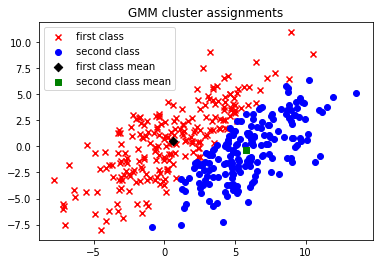

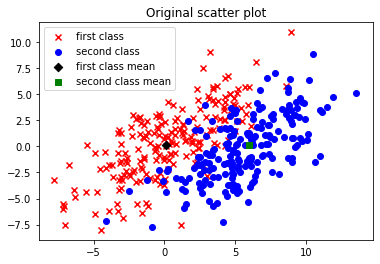

In [38]:
# Make a scatterplot for the data points showing the Gaussian Mixture cluster assignments of each point
plt.figure()
plt.scatter(class_1_points[0][:,0], class_1_points[0][:,1], marker = "x", c = 'red', label = "first class") # first class, x shape
plt.scatter(class_2_points[0][:,0], class_2_points[0][:,1], marker = "o", c = 'blue', label = "second class") # second class, circle shape
plt.scatter(Mu[:,0][0], Mu[:,0][1], marker = "D", c = 'black', label = "first class mean")
plt.scatter(Mu[:,1][0], Mu[:,1][1], marker = "s", c = 'green', label = "second class mean")
plt.title("GMM cluster assignments")
plt.legend()

#Plot original scatterplot for comparison
plt.figure()
plt.scatter(xy_class1[:,0], xy_class1[:,1], marker = "x", c = 'red', label = "first class") # first class, x shape
plt.scatter(xy_class2[:,0], xy_class2[:,1], marker = "o", c = 'blue', label = "second class") # second class, circle shape
plt.scatter(mean_1[0], mean_1[1], marker = "D", c = 'black', label = "first class mean")
plt.scatter(mean_2[0], mean_2[1], marker = "s", c = 'green', label = "second class mean")
plt.title("Original scatter plot")
plt.legend()

Misclassification error:0.11250000000000004


Text(0.5, 1.0, 'Misclassification error for EM algorithm')

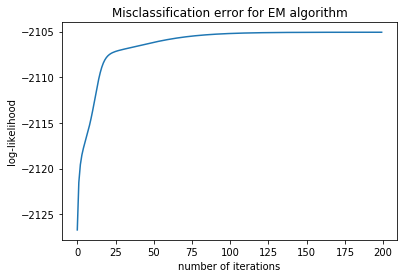

In [39]:
count_1 = 0
count_2 = 0
for i in class_1_points[0]:
    if i in x_class1:
        count_1 += 1
for i in class_2_points[0]:
    if i in x_class2:
        count_2 += 1
        
accuracy = (count_1+count_2) / N
error = 1 - accuracy
print("Misclassification error:" + str(error))

plt.plot(num_iter_log, log_likelihood_per_iter)
plt.xlabel('number of iterations')
plt.ylabel('log-likelihood')
plt.title("Misclassification error for EM algorithm")

## 4. Comment on findings + additional experiments

* Comparison of the performance of k-Means and EM based on the resulting cluster assignments.
   * From the above models for k-Means and EM, we can see that EM algorithm performs significantly better in terms of cluster assignments. This is also reflected in a lower misclassification rate. We have a misclassification error of EM at 0.10 but an error rate of 0.262 for k-Means. This is also reflected in the visual representations of the splits, where the splitting of two classes for EM is much more similar to that of the original data.
    
    
* Comparison of the performance of k-Means and EM based on their convergence rate and the bottleneck for each method.
    * However, in terms of convergence rate, we can see that k-Means performs better. Based on the plots for convergence in terms of number of iterations, we can see that $k_Means$ converges at around less than 5 iterations. For EM, the plot converges at around 30 iterations. This is especially a key and decisive factor when performing classification on a larger data set, since on my local machine, performing EM with default hyper paramters have already caused a time duration for 3-5 seconds (while k-Means finished performing almost instantly). So tradeoff or bottleneck for EM is to gain high accuracy but result in higher time complexity as well, while for k-Means, we have a worse performance in exchange for a faster time complexity.
    
    
* Experiment with 5 different data realizations and generate new data and evaluate the algorithm performance and whether or not it depended on different realizations of data.
    * In general, my findings were consistent (as shown below). The percentage difference for EM accuracy is almost always significantly higher. With my data (where I randomize sample_size, means, and covariance), my results (of percentage difference between the two algorithms on the same data) were as follows [20.500000000000007, 7.333333333333336, -3.749999999999998, 10.799999999999999, 23.83333333333333]. We can see that the only outlier was the 3rd data realization with K-means performing better in terms of accuracy with about 0.3%. This might be due to the selection of means, since I chose the mean of 5 for both dimensions for both data set, which might make the data to be clustered together. This is also reinforced by the fact that both models resulted in a very high misclassification rate (about 40%). In general, since EM aglorithm soft assigns a point to a certain clusters using softmax probability (instead of hard assignments used by k-Means), it is supposed to perform better in terms of accuracy as k-Means might be more biased towards certain "shapes" of data clustering. The only drawback is the longer time complexity required for the classification.


### Additional Experiments with different realizations of data for both algorithms

In [71]:
def samples_em(num_samples_1, cov_1, mean_1_1, mean_2_1):
    x_class1_1 = np.random.multivariate_normal(mean_1_1, cov_1, num_samples_1 // 2)
    x_class2_1 = np.random.multivariate_normal(mean_2_1, cov_1, num_samples_1 // 2)
    xy_class1_1 = np.column_stack((x_class1_1, np.zeros(num_samples_1 // 2)))
    xy_class2_1 = np.column_stack((x_class2_1, np.ones(num_samples_1 // 2)))
    data_full_1 = np.row_stack([xy_class1_1, xy_class2_1])
    np.random.shuffle(data_full_1)
    data_1 = data_full_1[:, :2]
    labels_1 = data_full_1[:, 2]

    N, D = data_1.shape
    K = 2
    Mu = np.zeros([D, K])
    Mu[:, 1] = 1.
    Sigma = [np.eye(2), np.eye(2)]
    Pi = np.ones(K) / K
    Gamma = np.zeros([N, K]) # Gamma is the matrix of responsibilities 
    max_iter  = 200
    num_iter_log = []
    log_likelihood_per_iter = []

    for it in range(max_iter):
        Gamma = gm_e_step(data_1, Mu, Sigma, Pi)
        Mu, Sigma, Pi = gm_m_step(data_1, Gamma)
        # print(it, log_likelihood(data, Mu, Sigma, Pi)) # This function makes the computation longer, but good for debugging
        num_iter_log.append(it)
        log_likelihood_per_iter.append(log_likelihood(data_1, Mu, Sigma, Pi))
    class_1 = np.where(Gamma[:, 0] >= .5)
    class_2 = np.where(Gamma[:, 1] >= .5)
    class_1_points = []
    class_2_points = []
    for i in class_1:
        class_1_points.append(data_1[i])
    for i in class_2:
        class_2_points.append(data_1[i])
    count_1 = 0
    count_2 = 0
    #print(x_class1)
    for i in class_1_points[0]:
        if i in x_class1_1:
            count_1 += 1
    #print(count_1)
    for i in class_2_points[0]:
        if i in x_class2_1:
            count_2 += 1
    #print(count_2)
    accuracy = (count_1+count_2) / N
    error = 1 - accuracy
    return error


In [79]:
def samples_km(num_samples_1, cov_1, mean_1_1, mean_2_1):
    x_class1_1 = np.random.multivariate_normal(mean_1_1, cov_1, num_samples_1 // 2)
    x_class2_1 = np.random.multivariate_normal(mean_2_1, cov_1, num_samples_1 // 2)
    xy_class1_1 = np.column_stack((x_class1_1, np.zeros(num_samples_1 // 2)))
    xy_class2_1 = np.column_stack((x_class2_1, np.ones(num_samples_1 // 2)))
    data_full_1 = np.row_stack([xy_class1_1, xy_class2_1])
    np.random.shuffle(data_full_1)
    data_1 = data_full_1[:, :2]
    labels_1 = data_full_1[:, 2]
    
    N, D = data_1.shape
    K = 2
    max_iter = 100
    class_init = np.random.binomial(1., .5, size=N)
    R = np.vstack([class_init, 1 - class_init]).T


    Mu = np.zeros([D, K])
    Mu[:, 1] = 1.
    R.T.dot(data_1), np.sum(R, axis=0)

    num_iter = []
    cost_per_iter = []

    for it in range(max_iter):
        R = km_assignment_step(data_1, Mu)
        Mu = km_refitting_step(data_1, R, Mu)
    #    print(it, cost(data, R, Mu))
        num_iter.append(it)
        cost_per_iter.append(cost(data_1, R, Mu))

    class_1 = np.where(R[:, 0])
    class_2 = np.where(R[:, 1])

    class_1_points = []
    class_2_points = []

    for i in class_1:
        class_1_points.append(data_1[i])

    for i in class_2:
        class_2_points.append(data_1[i])
        count_1 = 0
    count_2 = 0
    #print(x_class1)
    for i in class_1_points[0]:
        if i in x_class1_1:
            count_1 += 1
    for i in class_2_points[0]:
        if i in x_class2_1:
            count_2 += 1
    accuracy = (count_1+count_2) / N
    error = 1 - accuracy
    return error

#samples_km(num_samples_1, cov_1, mean_1_1, mean_2_1)

In [80]:
num_samples_1 = 200
#cov_1 = np.array([[.1, .3], [.7, .4]]) * 10
cov = np.array([[1., .7], [.7, 1.]]) * 10
cov_1 = np.array([[1., 0.7], [0.7, 1.]]) * 10
# cov_1 = cov
mean_1_1 = [.1, 1]
mean_2_1 = [6., .1]

num_samples_list = [200, 300, 400, 500, 600]
cov_list = [np.array([[1., .7], [.7, 1.]]) * 10, np.array([[1., 0.6], [0.6, 1.]]) * 10, 
           np.array([[1., 0.7], [0.7, 1.]]) * 10, np.array([[1., 0.8], [0.8, 1.]]) * 10,
           np.array([[1., 0.9], [0.9, 1.]]) * 10]
mean_1_list = [[.1, 1], [4, .1], [5, 5], [-4, .7], [5., .3]]
mean_2_list = [[6., .1], [3, 9], [5, 5], [4, .9], [10., 1.]]

em_error_list = []
km_error_list = []
# num_samples = 400
# cov = np.array([[1., .7], [.7, 1.]]) * 10
# mean_1 = [.1, .1]
# mean_2 = [6., .1]
# print(samples_em(num_samples, cov, mean_1, mean_2))

i = 0;
while i < 5:
#     print(i)
    
    num_samples_1 = num_samples_list[i]
    cov_1 = cov_list[i]
    mean_1_1 = mean_1_list[i]
    mean_2_1 = mean_2_list[i]
    
    em_error = samples_em(num_samples_1, cov_1, mean_1_1, mean_2_1)
    km_error = samples_km(num_samples_1, cov_1, mean_1_1, mean_2_1)
#     print("em")
#     print(em_error)
#     print("km")
#     print(km_error)
    em_error_list.append(em_error)
    km_error_list.append(km_error)
    i = i + 1
    
print("EM error rates for various data realizations")
# for i in em_error_list:
#     print(i)
print(em_error_list)
print("KM error rates for various data realizations")
# for i in km_error_list:
#     print(i)
print(km_error_list)

print("Percentage Difference of KM minus EM error rates")
percentage_list = []
i = 0
while i < 5:
    percentage_list.append((km_error_list[i]-em_error_list[i])*100)
    i +=1 
print(percentage_list)

EM error rates for various data realizations
[0.07999999999999996, 0.026666666666666616, 0.5, 0.018000000000000016, 0.06833333333333336]
KM error rates for various data realizations
[0.28500000000000003, 0.09999999999999998, 0.4625, 0.126, 0.30666666666666664]
Percentage Difference of KM minus EM error rates
[20.500000000000007, 7.333333333333336, -3.749999999999998, 10.799999999999999, 23.83333333333333]


# 2. Reinforcement Learning

Imported python files:
1. `maze.py`: defines the `MazeEnv` class, the simulation environment which the Q-learning agent will interact in.
2. `qlearning.py`: defines the implemented `qlearn` function, along with several helper functions.
3. `plotting_utils.py`: defines several plotting and visualization utilities, including `plot_steps_vs_iters`, `plot_several_steps_vs_iters`, `plot_policy_from_q`

In [40]:
from qlearning import qlearn
from maze import MazeEnv, ProbabilisticMazeEnv
from plotting_utils import plot_steps_vs_iters, plot_several_steps_vs_iters, plot_policy_from_q

## 1. Basic Q Learning experiments

### Run the algorithm several times on the given environment. Using the following hyperparameters:
1. Number of episodes = 200
2. Alpha ($\alpha$) learning rate = 1.0
2. Maximum number of steps per episode = 100. An episode ends when the agent reaches a goal state, or uses the maximum number of steps per episode
3. Gamma ($\gamma$) discount factor = 0.9
4. Epsilon ($\epsilon$) for $\epsilon$-greedy = 0.1 (10% of the time). Note that we should "break-ties" when the Q-values are zero for all the actions (happens initially) by essentially choosing uniformly from the action. So now you have two conditions to act randomly: for epsilon amount of the time, or if the Q values are all zero. 


In [41]:
num_iters = 200
alpha = 1.0
gamma = 0.9
epsilon = 0.1
max_steps = 100
use_softmax_policy = False

# Instantiate the MazeEnv environment with default arguments
env = MazeEnv()

# Run Q-learning:
q_hat, steps_vs_iters = qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy)

Visualize the learned greedy policy from the Q values:

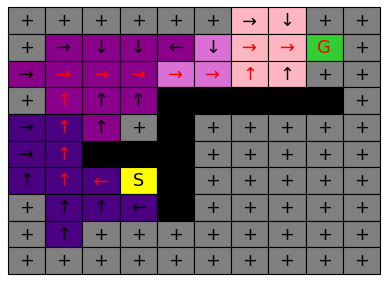

<Figure size 720x720 with 0 Axes>

In [43]:
# plot the policy from the Q value
plot_policy_from_q(q_hat, env)

Plotting the steps to goal vs training iterations (episodes):

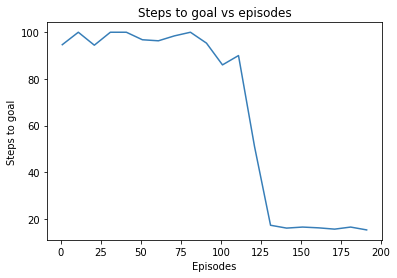

In [42]:
# Plot the steps vs iterations
plot_steps_vs_iters(steps_vs_iters)

We can see that using the epsilon greedy policy with default hyperparamters, the steps to goal drops drastically to around 20 at about 150 episodes/iterations, and from that it appears that the agent more or less converges. The sudden drop in terms of step to goals might be due to a new path explored (which could be due to the randomness given by epsilon) and that path turns out to be the optimal shortest path.

### Run the algorithm by passing in a list of 2 goal locations: (1,8) and (5,6). Note: we are using 0-indexing, where (0,0) is top left corner. 

In [70]:
num_iters = 200
alpha = 1.0
gamma = 0.9
epsilon = 0.1
max_steps = 100
use_softmax_policy = False

# Set the goal
goal_locs = [(1,8), (5,6)]
env = MazeEnv(goals=goal_locs)

# Run Q-learning:
q_hat, steps_vs_iters = qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy)

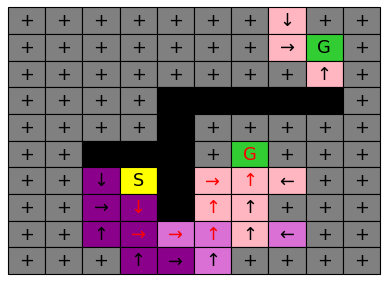

<Figure size 720x720 with 0 Axes>

In [71]:
# plot the policy from the Q values
plot_policy_from_q(q_hat, env)

Plot the steps to goal vs training iterations (episodes):

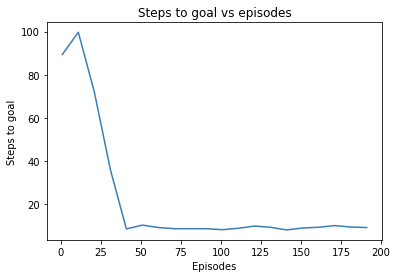

In [72]:
# Plot the steps vs iterations
plot_steps_vs_iters(steps_vs_iters)

The steps to goal here also show a dramatic drop at around 25 epsiodes and appear to converge for the rest of the iterations for the case of 2 goals. This could again be explained by the agent discovering a shortest path to the closest goal (from the 2 goals), then the agent's strategy would be to get to the closest of the 2 goals consistently and ignoring the further goals. This might be the reason why the 2-goals setting had a faster convergence rate than the 1 goal settings. The "bumps/spikes" along the way might be due to the epsilon choosing to explore a new path that is around the "further" goal, which is also resulted in a pink arrow head from the policy plot.

## 2. Experiment with the exploration strategy, in the original environment

### Use different $\epsilon$ values in $\epsilon$-greedy exploration: using a rate of $\epsilon$=10%, 50% and 1%. Graph the results (for 3 epsilon values) and discuss the costs and benefits of higher and lower exploration rates.

In [52]:
num_iters = 200
alpha = 1.0
gamma = 0.9
max_steps = 100
use_softmax_policy = False

# set the epsilon lists in increasing order:
epsilon_list = [0.01, 0.1, 0.5]

env = MazeEnv()
steps_vs_iters_list = []
for epsilon in epsilon_list:
   q_hat, steps_vs_iters = qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy)
   steps_vs_iters_list.append(steps_vs_iters)

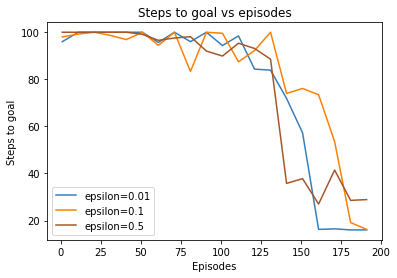

In [53]:
# Plot the results
label_list = ["epsilon={}".format(eps) for eps in epsilon_list]
plot_several_steps_vs_iters(steps_vs_iters_list, label_list, block_size=10)

We can see that epsilon 0.01 has the fastest convergence time and also most consistent as well at around 130 episodes. It is followed by epsilon of 0.1, which also seems to converge but had a consistently slightly higher steps to goal compared to 0.01 epsilon. The highest number of steps taken to goal is for epsilon 0.5 and it is also the one with most fluctations and spikes. This is due to the higher probability given by the epsilon value where the agent attempts to try out random actions 50% of the time, instead of choosing ones with lowest q-values (especially for explored paths already).

### Exploring with policy derived from **softmax of Q-values**. Use the values of $\beta \in \{1, 3, 6\}$ in the experiment, keeping $\beta$ fixed throughout the training.

In [57]:
# Static Beta with softmax of Q-values
num_iters = 200
alpha = 1.0
gamma = 0.9
epsilon = 0.1
max_steps = 100

# Set the beta
beta_list = [1,3,6]
use_softmax_policy = True
#k_exp_schedule = [0.05, 0.1, 0.25, 0.5] # (float) choose k such that we have a constant beta during training

env = MazeEnv()
steps_vs_iters_list = []
for beta in beta_list:
    q_hat, steps_vs_iters = qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy, init_beta=beta, k_exp_sched=0)
    steps_vs_iters_list.append(steps_vs_iters)

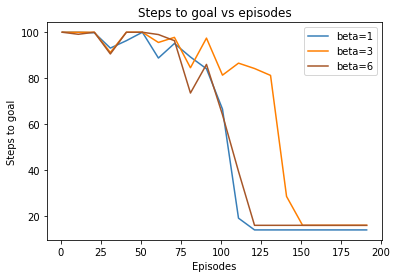

In [58]:
label_list = ["beta={}".format(beta) for beta in beta_list]
plot_several_steps_vs_iters(steps_vs_iters_list, label_list, block_size=10)

We used the softmax policy with 3 different values of beta, but fixing the k_exp_schedule to 0 (since only when k=0, beta will be equal to beta_0). As for the results, we can see that for beta values 1 and 3, the graph is more or less the same converging at around 120 episodes. For beta=6, the graph takes longer episodes (around 140) to converge, but it also converges to around 20 steps. Hence, by using the softmax function, a convergence is guaranteed.

### Instead of fixing the $\beta = \beta_0$ to the initial value, we will increase the value of $\beta$ as the number of episodes $t$ increase:

$$\beta(t) = \beta_0 e^{kt}$$

That is, the $\beta$ value is fixed for a particular episode.
We will then run the training again for different values of $k \in \{0.05, 0.1, 0.25, 0.5\}$, keeping $\beta_0 = 1.0$ and compare the results obtained with this approach to those obtained with a static $\beta$ value.

In [62]:
# Dynamic Beta
num_iters = 200
alpha = 1.0
gamma = 0.9
epsilon = 0.1
max_steps = 100

# Set the beta
beta = 1.0
use_softmax_policy = True
k_exp_schedule_list = [0.05, 0.1, 0.25, 0.5]
env = MazeEnv()

steps_vs_iters_list = []
for k_exp_schedule in k_exp_schedule_list:
    q_hat, steps_vs_iters = qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy, init_beta=1, k_exp_sched=k_exp_schedule)
    steps_vs_iters_list.append(steps_vs_iters)

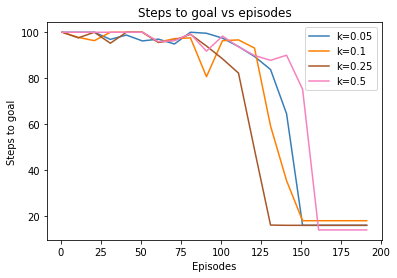

In [63]:
# Plot the steps vs iterations
label_list = ["k={}".format(k_exp_schedule) for k_exp_schedule in k_exp_schedule_list]
plot_several_steps_vs_iters(steps_vs_iters_list, label_list, block_size=10)

We have increased the value of beta as the number of episodes increases by training with the different values of k. For all values of k, we can see that it takes a lot longer to converge at around 170 episodes for all k except for k=0.1 This is longer than the 120 episodes compared to previous where static beta is fixed. There is also some inconsistency regarding the number of steps to goal (compared to static beta) as there is not much convergence of steps for the different values of k. For k=0.1, there is also a possibility of no convergence as it had reached the maximum number of iterations already. In general, static beta performed better in terms of nubmer of steps to goal after convergence and also in terms of epsiodes taken to convergence.

## 3. Stochastic Environments

(a) Make  the  environment  stochastic  (uncertain),  such  that  the  agent  only  has  a  95% chance  of  moving  in  the  chosen  direction,  and  has  a  5%  chance  of  moving  in  some random direction.

(b) Change the learning rule to handle the non-determinism, and experiment with different probability of environment performing random action $p_{rand} \in \{0.05, 0.1, 0.25, 0.5\}$ in this new rule.

Use the same parameters as in first part, except change the alpha ($\alpha$) value to be **less than 1**, e.g. 0.5.

In [64]:
# Use the same parameters as in the first part, except change alpha

num_iters = 200
alpha = 0.5
gamma = 0.9
epsilon = 0.1
max_steps = 100
use_softmax_policy = True
import numpy as np

# Set the environment probability of random
env_p_rand_list = [0.05,0.1,0.25,0.5]

steps_vs_iters_list = []
for env_p_rand in env_p_rand_list:
    # Instantiate with ProbabilisticMazeEnv
    env = ProbabilisticMazeEnv()

    # Note: We will repeat for several runs of the algorithm to make the result less noisy
    avg_steps_vs_iters = np.zeros(num_iters)
    for i in range(10):
        q_hat, steps_vs_iters = qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy, init_beta=1, k_exp_sched=0.1)
        avg_steps_vs_iters += steps_vs_iters
    avg_steps_vs_iters /= 10
    steps_vs_iters_list.append(avg_steps_vs_iters)

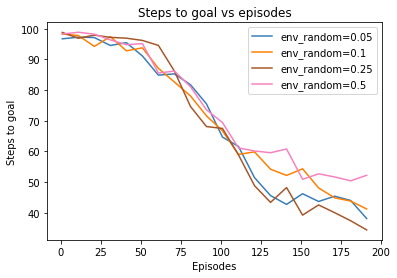

In [97]:
label_list = ["env_random={}".format(env_p_rand) for env_p_rand in env_p_rand_list]
plot_several_steps_vs_iters(steps_vs_iters_list, label_list, block_size=10)

Now, since a stochastic environment is used, we can observe a steadily decreasing slope of all 4 random environment probabilities. This is a "smoother" decrease compared to all previous experiments, however there is also more inconsistency in terms of convergence of the number of steps to goal (as the graphs seem to continue to decrease even when we reach 200 episodes and there is also lots of fluctuations and spikes for each env_random). In general, env_random of 0.05 and 0.25 appear to reach the lowest number of steps to goal at around 30, followed by env_random=0.1. When env_random=0.5, we see that althought the graph seems to decrease and converge the number of steps to goal is as high as 50 and the flucatutions are also more extreme during each epsiodes. Intuitively, this makes sense as our environment now performs a random action 50% of the time and our agent appear to have a hard time learning and choosing the optimal path with the non-determinism of this new environment.
